# Homework 1

### 1. Assume we implemented an algorithm that has complexity approximately $n log(n)$. How much faster is this implementation compared to one of complexity $n^2$?

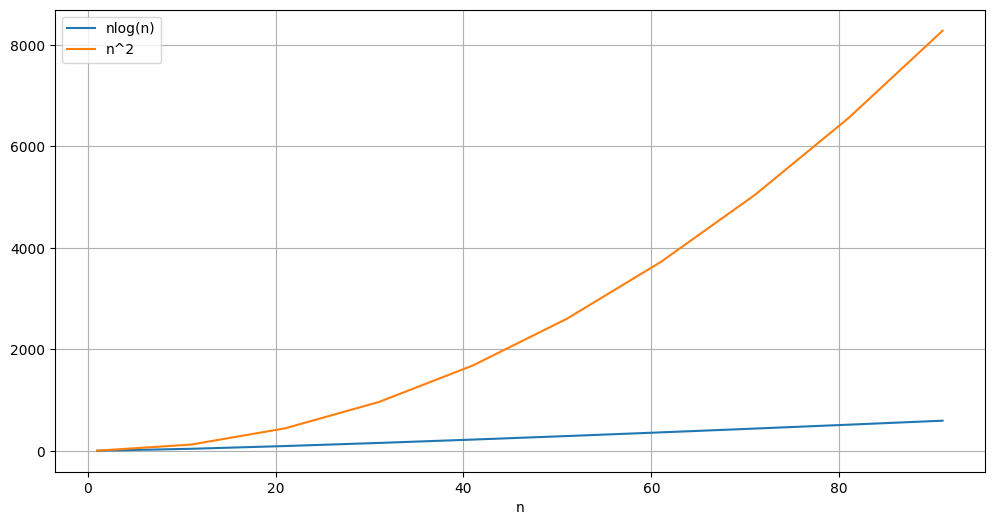

In [1]:
'''El código utilizado pertenece a las diapositivas de week2-3, modificado a conveniencia
de responder la presente pregunta'''

#Importación de bibliotecas numpy (control de matrices), pandas (manejo de datos), matplotlib (graficador)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

r = pd.DataFrame() #Inicializa el frame para almacenamiento de datos
r['n'] = np.arange(1,100,10) #X values

#Valores de Y obtenidos de evaluar r['n'] en las funciones nlog(n) y n^2
r['nlog(n)'] = r['n'] * np.log2(r['n'])
r['n^2'] = np.power(r['n'],2)

#Graficacion y diseño
r.plot(x='n', figsize=(12,6))
plt.xlabel('n')
plt.grid()

Como se puede observar en el grafico, un algoritmo de complejidad $O(nlog(n))$ siempre es mas veloz que uno de complejidad $O(n^2)$ \
Colaboración con: Josué Sebastián Endara

### 2. The runtime of an algorithm is captured in the following table:

As precissely as possible, estimate the function that describes the growth of the runtime 

|$n$  | runtime -- $T(n)$|
|---- | ----- |
|1000|0.0|
|2000|0.02|
|4000|0.2|
|8000|0.6|
|16000|2.6|
|32000|10.4|
|64000|41.6|

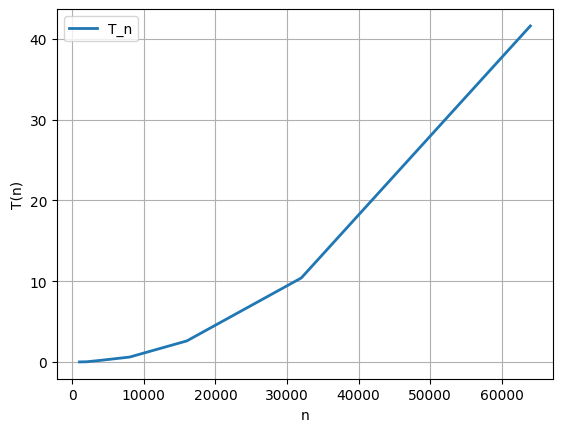

In [2]:
data_frame = pd.DataFrame()
#Tomando los datos de la tabla presentada
data_frame['n'] = [1000, 2000, 4000, 8000, 16000, 32000, 64000]
data_frame['T_n'] = [0.0, 0.02, 0.2, 0.6, 2.6, 10.4, 41.6]
#Graficacion de datos
data_frame.plot(x='n', y='T_n', lw=2)
plt.xlabel('n')
plt.ylabel('T(n)')
plt.grid()


Observando el grafico, podemos establecer como hipotesis inicial que la complejidad del algoritmo es equivalente a una funcion cuadratica. $f(n)=n^2$

Podemos comprobarlo mediante analisis matematico, en este caso, se intentara con una regresion.

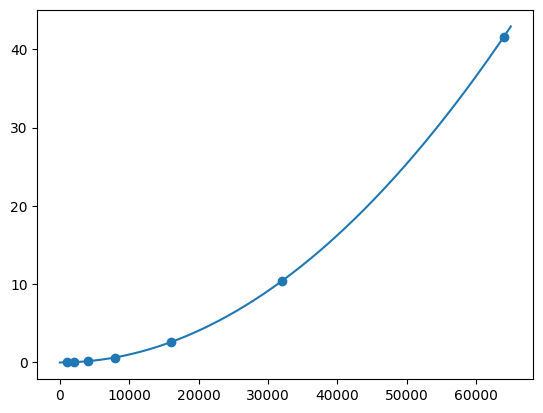

In [3]:
mymodel = np.poly1d(np.polyfit(data_frame['n'], data_frame['T_n'], 2)) #regresion polinomial de grado 2

myline = np.linspace(0, 65000, 10000) #valores para x-axis.

#Graficacion de los datos
plt.scatter(data_frame['n'], data_frame['T_n'])
plt.plot(myline, mymodel(myline))
plt.show()

Con los puntos dados en la tabla, se realizo una regresion polinomial de grado 2 (ya que esta fue mi hipotesis inicial) utilizando la libreria numpy. Como se observa en el grafico, vemos que el modelo pasa a traves de todos los puntos, por lo que se puede asegurar que fue una muy buena aproximacion. 
Por lo tanto, cuando $n \rightarrow \infty$, la funcion que mas se adecua a los puntos es una cuadratica tal que $f(n)=n^2$\
Colaboración con: Jousé Sebastián Endara

### 3. By estimating the number of operations as a function of $n$, estimate the complexity of the following function

```
def func1(n):                                             
    A = range(0,n)                                
    sum = 0                                       
    i = 0                                         
    for x in A[i:]:                               
        i += 1                                    
        for j in range(i, len(A)):               
            y = A[j]                             
            k = j                                
            while k < len(A):                    
                z = A[k]                          
                k = 2*k                             
                if x + y <= z:                    
                    sum += 1                      
    return sum                                   
```

El primer bucle for itera n veces ya que x solo toma el valor del primer elemento de A[i:] por cada iteración, cuyo tamaño es n, entonces su complejidad es $O(n)$. El segundo bucle for itera, en el peor de los casos, n-1 veces, cuando n tiende a infinito, el término $-1$ no importa entonces la complejidad es $O(n)$. Finalmente, en el bucle while, la variable que itera cada vez aumenta en orden k=2*k, esto nos da un indicio de que la complejidad es $O(log(n))$.\
Finalmente, multiplicando las tres complejidades, se obtiene que la complejidad de todo el algoritmo es $O(n^2log(n))$

Colaboración con Josué Endara

### 4. From class, remember the code we use to get the sum of the first $n$ positive integers:

```
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
```

Now consider a different function that does the same thing.

```
def sum2(n): 
    total = n*(n+1)//2
    return total
```

1. Run the two functions and make sure that they return the same outputs. Use $n = 5, 8, 103, 527$
2. Use Python time library to estimate the runtime for inputs of $n = [1, 10, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7, 10^8, 10^9]$
3. Plot the runtime as a function of $n$ for both functions in the same figure. 
    - Use different line colors and markers to help distinguish between the two curves. 
4. Analytically estime the runtime functions for the functions `sum1` and `sum2`. Call them $T_1(n)$ and $T_2(n)$.
    - Note that the times obtained in your computer will be different to the ones shown in class since the speed and memory of the computers used to run the code are likely different
5. How long will it take to run the code for $n = 10^{100}$ using `sum1` and `sum2`? What are your main impressions about the difference?

**Hint:** Use and modify the code from the slides to get and plot the runtime


In [54]:
from time import time
from time import time_ns
from time import sleep

#Python decorator
def dec_timer(passed_func):
    def wrap(*args, **kwargs): #Inner function
        t_init = time()*10**6 #Toma del tiempo inicial
        result = passed_func(*args, **kwargs) #Se ejecuta la fucion a evaluar su tiempo de ejecucion
        t_final = time()*10**6 #Toma el tiempo final
        t_total = t_final-t_init
        print(f'La funcion {passed_func.__name__!r},n = {args[0]}, se ejecuto en {(t_total-10**6):.4f} micro_s') #Despliega el tiempo tomado
        return (result, t_total) #Retorna el valor de la funcion de interes
    return wrap #Completa el decorador
    
@dec_timer #Uso de decorador
def sum1(n):
    sleep(1)
    total = 0
    for i in range(1, n+1):
        total += i
    return total

@dec_timer #uso de decorador
def sum2(n):
    sleep(1) 
    total = n*(n+1)//2
    return total

In [55]:
#Pregunta 1
n = [5, 8, 103, 527]

#Almacenamiento de resultados al evaluar los valores de n en la funcion sum1
print("Funcion sum1:")
sum1Arr = [sum1(i)[0] for i in n]
print('\nOutput:\n',sum1Arr)

#Almacenamiento de resultados al evaluar los valores de n en la funcion sum2
print("\nFuncion sum2:")
sum2Arr = [sum2(i)[0] for i in n]
print('\nOutput:\n', sum2Arr)

#Comprobacion. Los resultados de la evaluacion en sum1 son los mismos que de sum2?
print('\nOutput sum1 equals sum2? ', sum1Arr==sum2Arr)

Funcion sum1:
La funcion 'sum1',n = 5, se ejecuto en 12710.5000 micro_s
La funcion 'sum1',n = 8, se ejecuto en 10150.5000 micro_s
La funcion 'sum1',n = 103, se ejecuto en 11600.2500 micro_s
La funcion 'sum1',n = 527, se ejecuto en 14027.0000 micro_s

Output:
 [15, 36, 5356, 139128]

Funcion sum2:
La funcion 'sum2',n = 5, se ejecuto en 10664.5000 micro_s
La funcion 'sum2',n = 8, se ejecuto en 13466.5000 micro_s
La funcion 'sum2',n = 103, se ejecuto en 9952.5000 micro_s
La funcion 'sum2',n = 527, se ejecuto en 10182.2500 micro_s

Output:
 [15, 36, 5356, 139128]

Output sum1 equals sum2?  True


Ambas funciones regresan la misma salida.

In [57]:
#Pregunta 2
n_2 = [1, 10, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9] #Almacenamiento de los datos en una lista
print("Tiempo de ejecucion sum1")
sum1_times = [sum1(i)[1] for i in n_2] #Impresion y almacenamiento de los tiempos de ejecucion para la funcion sum1
sum1_times = [i-10**6 for i in sum1_times]
print("\nTiempo de ejecucion sum2:")
sum2_times = [sum2(i)[1] for i in n_2] #Impresion y almacenamiento de los tiempos de ejecucion para la funcion sum2
sum2_times = [i-10**6 for i in sum2_times]


Tiempo de ejecucion sum1
La funcion 'sum1',n = 1, se ejecuto en 3047.5000 micro_s
La funcion 'sum1',n = 10, se ejecuto en 13205.2500 micro_s
La funcion 'sum1',n = 100, se ejecuto en 4837.0000 micro_s
La funcion 'sum1',n = 1000, se ejecuto en 9075.0000 micro_s
La funcion 'sum1',n = 10000, se ejecuto en 11344.5000 micro_s
La funcion 'sum1',n = 100000, se ejecuto en 13117.7500 micro_s
La funcion 'sum1',n = 1000000, se ejecuto en 34693.2500 micro_s
La funcion 'sum1',n = 10000000, se ejecuto en 332434.0000 micro_s
La funcion 'sum1',n = 100000000, se ejecuto en 3004031.2500 micro_s
La funcion 'sum1',n = 1000000000, se ejecuto en 31761563.2500 micro_s

Tiempo de ejecucion sum2:
La funcion 'sum2',n = 1, se ejecuto en 4825.7500 micro_s
La funcion 'sum2',n = 10, se ejecuto en 14582.2500 micro_s
La funcion 'sum2',n = 100, se ejecuto en 11259.2500 micro_s
La funcion 'sum2',n = 1000, se ejecuto en 10003.7500 micro_s
La funcion 'sum2',n = 10000, se ejecuto en 6863.0000 micro_s
La funcion 'sum2',n = 

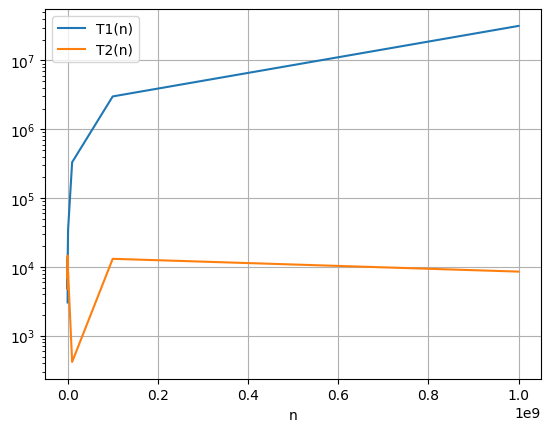

In [59]:
#Pregunta 3
df_sum_funcs = pd.DataFrame() #Inicializo el frame para los datos
df_sum_funcs["n"] = n_2

#Creacion de la tabla de datos con los valores almacenados de tiempos de ejecucion
df_sum_funcs["T1(n)"] = sum1_times
df_sum_funcs["T2(n)"] = sum2_times

# Graficacion de los tiempos de ejecucion
df_sum_funcs.plot(x='n', logy=True)
plt.xlabel('n')
plt.grid()


Pregunta 4
```
def sum1(n):                            cost        time
    total = 0                           c1          1
    for i in range(1, n+1):             c2          n
        total += i                      c3          ''
    return total                        c4          1
```
Cuando $n\rightarrow\infty$ la funcion `sum1` tiene un tiempo de ejecucion lineal. Entonces su complejidad es $O(n)$

```
def sum2(n):                            cost        time
    total = n*(n+1)//2                  d1          1
    return total                        d2          1
```
Para cualquier valor de $n$ el tiempo de ejecucion de la funcion `sum2` sera constante. Entonces su complejidad es $O(1)$

Pregunta 5\
Como se analizo en el literal anterior, la funcion `sum1` tiene un tiempo de ejecucion determinado por $f(n)=n$, por lo tanto, si $n=10^{100}$, aproximadamente, a `sum1` le tomaria $10^{100}$ unidades de tiempo realizar la sumatoria. Un numero extremadamente gigante.\
Por otra parte, la funcion `sum2` tiene un tiempo de ejecucion constante: no importa que tan grande sea $n$, siempre demorara lo mismo. Entonces, si $n=10^{100}$ a `sum2` le tomara una unidad de tiempo realizar la sumatoria. 


Colaboración con: Josué Sebastián Endara.

### 5. Prove that the running time of an algorithm is $\Theta(g(n))$ if and only if its worst-case running time is $O(g(n))$ and its best-case running time is $\Omega(g(n))$

> $\Theta(g(n)) = \{f(n) : \exists c_1, c_2, n_0 > 0, \text{such that } 0 \leq c_1g(n) \leq f(n) \leq c_2g(n), \forall n \geq n_0 \}$

Primero, recordemos la definicion de $\Theta(g(n))$
> $\Theta(g(n)) = \{f(n) : \exists c_1, c_2, n_0 > 0, \text{such that } 0 \leq c_1g(n) \leq f(n) \leq c_2g(n), \forall n \geq n_0 \}$

Esto nos quiere decir que la funcion $f(n)$, que representa la funcion de complejidad exacta de un algoritmo, tiene como cota superior e inferior a una funcion $g(n)$ multiplicada por las constantes $c_1$ y $c_2$ tal que $c_1 \leq c_2$.\
Ahora consideremos las definiciones de $O(g(n))$ y  $\Omega(g(n))$ 
> $O(g(n)) = \{f(n) : \exists c, n_0 > 0 \text{ such that } 0 \leq f(n) \leq cg(n), \forall n \geq n_0 \}$

> $\Omega(g(n)) = \{f(n) : \exists c, n_0 > 0 \text{ such that } 0 \leq cg(n) \leq f(n), \forall n \geq n_0 \}$

$O(g(n))$ describe la existencia de una funcion $g(n)$ multiplicada por una constante $c>0$ que acota $f(n)$ (previamente descrita) superiormente para todo valor posible de $n$, esto quiere decir que $g(n)$ es un supremo. Interpretando esto de forma computacional, $O(g(n))$ seria el tiempo maximo de ejecucion en el peor de los casos para un algoritmo.\
De igual manera, $\Omega(g(n))$ denota la existencia de una $g(n)$ multiplicada por una constante $c>0$ que acota $f(n)$ inferiormente para todo $n$, asi, $g(n)$ es un infimo. En algoritmia, $\Omega(g(n))$ representa el tiempo de ejecucion ante el mejor de los casos para un algoritmo.

Dado que no existe tiempo de ejecucion mas alto que el descrito por $O(g(n))$ y tampoco existe uno menor al descrito por $\Omega(g(n))$ entonces esta funcion $g(n)$ cumple con la definicion de $\Theta(g(n))$ cuando $c_1 \leq c_2$. Asi queda demostrado que el tiempo de ejecucion de un algoritmo es $\Theta(g(n))$ si el peor tiempo de ejecucion es $O(g(n))$ y el mejor es $\Omega(g(n))$

### 6.  Sort the following functions in decreasing order of asymptotic complexity ($O(f(n))$):

- $f_1(n) = \sqrt{n}$
- $f_2(n) = n^3$
- $f_3(n) = {n\choose 4}$
- $f_4(n) = \sum_{i=2}^n (i-1)$

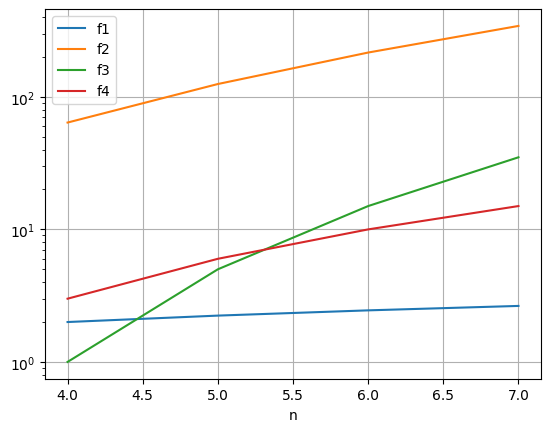

In [8]:
import math
# Definicion de las funciones f1, f2, f2 y f4 de acuerdo al enunciado
f1 = lambda n: math.sqrt(n) #lambda expression para ahorrar lineas de codigo
f2 = lambda n: n**3
f3 = lambda n: math.perm(n)/(math.perm(4)*math.perm(n-4))
def f4(n):
    '''Summatory function
    Sigma^n_i=2(i-1)
    '''
    result=0
    for i in range(2, n):
        result+=(i-1)
    return result
n_6 = range(4, 8) #Valores para el eje x

data_frame_ordering = pd.DataFrame() #Incializacion de frame de datos.
# Evaluacion y almacenamiento de datos para valores de n no grandes. 
data_frame_ordering["n"] = n_6
data_frame_ordering["f1"] = [f1(i) for i in n_6]
data_frame_ordering["f2"] = [f2(i) for i in n_6]
data_frame_ordering["f3"] = [f3(i) for i in n_6]
data_frame_ordering["f4"] = [f4(i) for i in n_6]
#Graficacion de funciones. 
data_frame_ordering.plot(x='n', logy=True)
plt.grid()

Nota: Para valores muy pequeños de $n$ (en este caso, el valor mas pequeño dado fue $n=4$) la funcion de coeficiente binomial ($f_3$) tiene el tiempo de ejecucion mas pequeño, le sigue $f_1$, luego $f_4$ y finalmente $f_2$. Esta informacion no se solicito en el enunciado pero queda como curiosidad. Ahora pasemos a valores de $n\rightarrow\infty$

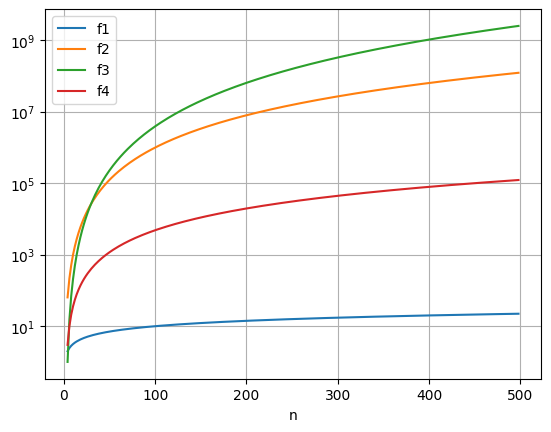

In [9]:
n_6 = range(4, 500, 2) #Valores de n que tienden a infinito

data_frame_ordering = pd.DataFrame()
# Evaluacion y almacenamiento de datos para valores de n grandes. 
data_frame_ordering["n"] = n_6
data_frame_ordering["f1"] = [f1(i) for i in n_6]
data_frame_ordering["f2"] = [f2(i) for i in n_6]
data_frame_ordering["f3"] = [f3(i) for i in n_6]
data_frame_ordering["f4"] = [f4(i) for i in n_6]
# Graficacion
data_frame_ordering.plot(x='n', logy=True)
plt.grid()

Con $n\rightarrow\infty$ ahora podemos ordenar de forma decreciente la complejidad $O(f_i(n))$:\
$f_3(n)>f_2(n)>f_4(n)>f_1(n)$

### 7. Implement the methods of the class `Array` that deal with deletion of elements. Consider the 3 cases we considered in class.

Codigo re-utilizado de la clase de "Arrays" visto en la semana 4 del curso. 

In [10]:
#Codigo reutilizado de la clase de Arrays. Realizado por Alejandro, profesor de la materia.
import ctypes

class Array(object):
    """
    Implementation of the array data structure
    """

    def __init__(self, n, values=None):
        self.l = 0
        self.n = n
        self.array = self._create_array(self.n)
        if values:
            self.initialize_array(values)   
    
    def _create_array(self, n):
        """
        Creates a new array of capacity n
        """
        return (n * ctypes.py_object)()
    def __getitem__(self, item_index):
        """
        Return element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        try:
            x = self.array[item_index]
        except ValueError:
            x = None
        return x

    def __setitem__(self, item_index, item):
        """
        Set element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        self.array[item_index] = item
            
    def initialize_array(self, values):
        """
        Initialize array
        """
        if self.n != len(values):
            raise ValueError("element count different than capacity")
        for item in values:
            self.array[self.l] = item
            self.l += 1
            
    def list_array(self):
        """
        List elements of the array
        using list comprehension
        """
        return ", ".join(str(x) if x is not None else '_' for x in self)

    def insert(self, index, element):
        """
        implementation of insert
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        if (index < 0) or (index > self.l):
            raise IndexError('index out of range!')
        x = self.l
        while x > index:
            self.array[x] = self.array[x-1]
            x -= 1
        self.array[index] = element
        self.l += 1

Implementacion de los metodos de eliminacion considerando los 3 casos:
-   Primer elemento
-   Ultimo elemento
-   Elemento con indice

In [11]:
class Array(Array):
    def del_first(self):
        '''
        La funcion se encarga de eliminar el primer elemento de un array. 
        return None
        '''
        iter = 1
        if self.l:
            while (iter < self.l): #ejecutar mientras iter sea menor que la cantidad de objetos dentro del array
                self.array[iter-1] = self.array[iter] #Recorre todos elementos del array un 'espacio' a la izquierda.
                iter += 1
            self.array[self.l-1] = None #setea el ultimo elemento del array como None. 
            self.l -= 1 #reduce la cantidad de elementos del array en 1.
        else:
            raise ValueError('No hay elementos en el array.')
    
    def del_last(self):
        '''
        La funcion elimina el ultimo elemento de un array.
        return None'''
        if self.l: #evalua si el arreglo no esta vacio.
            self.array[self.l-1] = None #Setea el ultimo elemento de un array con valor None
            self.l -= 1#reduce la cantidad de elementos del array en 1.
        else:
            raise ValueError('No hay elementos en el array.') #Lanza un error en caso de que el array este vacio.

    def del_index(self, index):
        '''La funcion borra un elemento del array de acuerdo al indice.
        return None'''
        if index < self.l: #verifica si el indice tiene un valor asociado
            self.array[index] = None #Setea el valor asociado al indice como Nulo
            #Se recorren los demas elementos hacia la izquierda
            while (index < self.l): 
                if index+1 == self.l:
                    break
                self.array[index] = self.array[index+1]
                index += 1
            self.array[self.l-1]  = None #El ultimo elemento se setea como nulo
            self.l -= 1 #disminuye la cantidad de elementos del arreglo en 1.
        else:
            raise IndexError("El valor asociado al indice ya es nulo.") #Lanza un error si el array esta vacio.
        

In [12]:
arr = Array(5, ['Chris', 'Edu', 'Noel', 'Josue', 'Guillermo'])
print(arr.list_array())
arr.del_first()
print(arr.list_array())
arr.del_last()
print(arr.list_array())
arr.del_index(1)
print(arr.list_array())


Chris, Edu, Noel, Josue, Guillermo
Edu, Noel, Josue, Guillermo, _
Edu, Noel, Josue, _, _
Edu, Josue, _, _, _
